In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 기본값으로 설정 (처음 5개와 마지막 5개 행만 출력)
pd.reset_option('display.max_rows')

# 출력 포맷 설정 (소수점 4자리까지)
pd.options.display.float_format = '{:.4f}'.format

import platform
import seaborn as sns

import matplotlib.pyplot as plt

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


## 데이터 로드

In [2]:
df = pd.read_csv('../data/4_재무피처생성.csv', dtype = {'거래소코드' : 'object'}, encoding='euc-kr')

In [3]:
df.shape

(21988, 176)

In [4]:
df.head()

,회사명,거래소코드,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,유동자산,재고자산,자본,매출액,매출원가,판매비와 관리비(물류원가 등 포함),기타(영업)비용,당기제조원가,급여,퇴직급여,상품매출원가,제품매출원가,감가상각비,대손상각비,개발비상각,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,외환차익2,외화환산이익2,외환차손2,외환환산손실2,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,(연차배당),(중간배당),배당금지급(-),단기차입금,매입채무 및 기타유동채무,매출채권 및 기타유동채권,비유동자산,사채,유동금융자산,유동부채,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,현금및현금성자산,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,종업원1인당 매출액(IFRS)(백만원),종업원1인당 부가가치(IFRS)(백만원),종업원1인당 인건비(IFRS)(백만원),종업원수,비유동부채,영업활동현금흐름,부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,년도차,자산_전기,자산증가율,유형자산_전기,유형자산증가율,유동자산_전기,유동자산증가율,재고자산_전기,재고자산증가율,자본_전기,자본증가율,매출액_전기,매출액증가율,자산평균,유형자산평균,무형자산_전기,무형자산평균,건설중인자산_전기,건설중인자산평균,토지_전기,토지평균,자본평균,총자산회전율,감가상각율,배당률,판관비체크,순외환손익대비매출액,매출원가대비매출액,당기총제조비용,재고조정중의고정비,고정비,총비용,변동비,변동비대비매출액,고정비대비매출액,인건비대비매출액,인건비대비영업총비용,종업원1인당매출액_ts,종업원1인당부가가치_ts,종업원1인당인건비_ts,1인당매출액,1인당인건비,1인당매출액_차이,재고자산평균,비유동자산_전기,비유동자산평균,매출채권 및 기타유동채권평균,장기매출채권 및 기타비유동채권평균,매입채무 및 기타유동채무평균,장기매입채무 및 기타비유동채무평균,주주이익(버핏),순운전자본(민식),유무형자산,영업현금흐름대비투하자본,ROTCE현금흐름대체,유형자산대비현금흐름,유무형자산대비현금흐름,매출대비고정자산,단기차입금_전기,단기차입금평균,장기차입금_전기,장기차입금평균,유동비율,현금비율,당좌비율,자기자본비율,비유동비율,부채비율,유동부채비율,비유동부채비율,비유동장기적합률,차입금의존도,매출채권대비매입채무,순운전자본,순운전자본대비총자본,차입금대비매출액,매출채권대비매입채무_before,영업활동현금흐름 대 총자산,영업활동현금흐름 대 매출액,투자안정성비율,영업활동현금흐름 대 투자활동현금지출,경영자산회전율분모,매출채권,매입채무,차입금,경영자산회전율분모_전기,매출채권_전기,매입채무_전기,차입금_전기,부채_전기,자본금_전기,영업활동현금흐름 대 총부채,자기자본회전율,자본금회전율,경영자산회전율,비유동자산회전율,유형자산회전율,재고자산회전율,매출채권회전율,매입채무회전율,차입금 대 매출액
0,동화약품(주),000020,2011/12,1976/03/24,NaN,2011,1976,KOSPI,339431477.0000,188283834.0000,132321355.0000,32162708.0000,229623874.0000,234561984.0000,126631732.0000,82308587.0000,0.0000,96193967.0000,27468031.0000,2727650.0000,0.0000,0.0000,1158384.0000,209060.0000,0.0000,1287424.0000,153219.0000,21043.0000,153712.0000,8891.0000,0.0000,0.0000,0.0000,0.0000,5222595.0000,0.0000,57402144.0000,26919758.0000,172752303.0000,20437680.0000,97400000.0000,2793123.0000,0.0000,-2793123.0000,0.0000,38755341.0000,62808983.0000,207110122.0000,0.0000,1920000.0000,87860192.0000,18500000.0000,168065.0000,646910.0000,10000000.0000,35134387.0000,46244032.0000,9145828.0000,637372.0000,1078470.0000,289.5800,103.6800,63.4600,810.0000,21947412.0000,46244032.0000,109807603.0000,9145828.0000,207000.0000,32049176.0000,22619738.0000,27931470.0000,7719680.0000,25621666.0000,14.5800,NaN,339431477.0000,NaN,188283834.0000,NaN,NaN,NaN,32162708.0000,NaN,229623874.0000,NaN,NaN,NaN,339431477.0000,188283834.0000,5222595.0000,5222595.0000,0.0000,0.0000,57402144.0000,57402144.0000,229623874.0000,0.6910,0.6980,1.2164,True,0.0142,53.9865,111345884.0000,2072670.1942,19825378.6942,208940319.0000,189114940.3058,80.6247,8.4521,12.8732,36.6859,289580.0000,103680.0000,63460.0000,289583.0000,33911.0000,3.0000,32162708.0000,207110122.0000,207110122.0000,62808983.0000,646910.0000,38755341.0000,168065.0000,38906640.0000,95618601.0000,193506429.0000,0.1599,0.1528,0.2456,0.2390,0.2233,0.0000,0.0000,10000000.0000,10000000.0000,150.6044,39.9890,42.1743,67.6496,90.1954,47.8206,38.2627,9.5580,82.3266,8.3964,163.0276,44461163.0000,13.0987,4.2633,163.0276,13.6240,19.7151,517.3389,490.4219,331711797.0000,63455893.0000,38923406.0000,10000000.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0215,NaN,NaN,1.1325,1.2458,7.2930,NaN,NaN,NaN
1,동화약품(주),000020,2012/12,1976/03/24,NaN,2012,1976,KOSPI,324284672.0000,183871644.0000,121235712.0000,31594443.0000,226994670.0000,223371997.0000,124599323.0000,88769770.0000,0.0000,97520946.0000,28929004.0000,3189920.0000,0.0000,0.0000,1156381.0000,106812.0000,0.0000,1328828.0000,157484.0000,760.0000,160705.0000,5929.0000,0.0000,0.0000,0.0000,0.0000,4194707.0000,2517010.0000,58295911.0000,26919758.0000,169661268.0000,3046645.0000,111400000.0000,2793123.0000,0.0000,-2793123.0000,0.0000,33824773.0000,55205526.0000,203048961.0000,0.0000,16020000.0000,82599853.0000,10000000.0000,235534.0000,646910.0000,0.0000,18119216.0000,25226760.0000,6482544.0000,362246.0000,851304.0000,275.0900,91.9100,66.8900,812.0000,14690149

## 불필요 데이터 제거

In [5]:
# 증가율, 이자보상배율이 nan인 데이터 제거

cols_rate = df.columns[df.columns.str.endswith('증가율')].tolist()
cols_rate

['자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자본증가율', '매출액증가율']

In [6]:
# '자산증가율', '유형자산증가율', '유동자산증가율', '재고자산증가율', '자본증가율', '매출액증가율', '이자보상배율'
# 중 하나라도 nan인 데이터 제거
df = df.dropna(
    subset = cols_rate + ['이자보상배율'],
    how='any'
)

df.shape

(18626, 176)

## 데이터셋 구성

In [7]:
# 상장 종목 수 확인
df['거래소코드'].nunique()

2250

### 결측치 존재하는 컬럼 확인

In [8]:
df.columns[df.isna().sum()>0]

Index(['상장폐지일', '종업원1인당 매출액(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)',
       '종업원1인당 인건비(IFRS)(백만원)', '종업원수', '배당률', '순외환손익대비매출액', '종업원1인당매출액_ts',
       '종업원1인당부가가치_ts', '종업원1인당인건비_ts', '1인당매출액', '1인당인건비', '1인당매출액_차이',
       '비유동부채비율', '투자안정성비율', '영업활동현금흐름 대 투자활동현금지출', '경영자산회전율분모_전기', '매출채권_전기',
       '매입채무_전기', '차입금_전기', '부채_전기', '자본금_전기', '영업활동현금흐름 대 총부채', '자본금회전율',
       '경영자산회전율', '매출채권회전율', '매입채무회전율', '차입금 대 매출액'],
      dtype='object')

### 부실징후 확인 : t년도 이자보상배율 < 1

In [9]:
df['flag'] = (df['이자보상배율'] < 1)

### label 생성
- (t년도 이자보상배율<1)인 데이터 중
  - (t+1년도 이자보상배율>=1) : label=1
  - (t+1년도 이자보상배율<1) : label=0

In [10]:
# 결산년도 차이가 1인 경우, 연속된 보고서
df['결산년도_diff'] = df.groupby('거래소코드')['결산년도'].diff(-1)

# t+1년도 flag(=이자보상배율<1)를 flag_t+1에 저장
df['flag_t+1'] = df.groupby('거래소코드')['flag'].shift(-1)

In [11]:
df[['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1']].head()

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1
1,동화약품(주),000020,2012/12,9.4700,False,-1.0000,False
2,동화약품(주),000020,2013/12,5.3700,False,-1.0000,False
3,동화약품(주),000020,2014/12,33.6500,False,-1.0000,False
4,동화약품(주),000020,2015/12,35.2100,False,-1.0000,False
5,동화약품(주),000020,2016/12,1461.3000,False,-1.0000,False


In [12]:
df[['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1']].tail()

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1
21979,코오롱티슈진(주),950160,2020/12,-49.7500,True,-1.0000,True
21980,코오롱티슈진(주),950160,2021/12,-100.5500,True,-1.0000,True
21981,코오롱티슈진(주),950160,2022/12,-43.9200,True,NaN,NaN
21986,(주)소마젠,950200,2021/12,-28.3800,True,-1.0000,True
21987,(주)소마젠,950200,2022/12,-6.0900,True,NaN,NaN


In [13]:
# 레이블 설정

# t+1년도 이자보상배율>=1 : label=1(회생)
df.loc[
    (df['flag']==True) & (df['결산년도_diff']==-1) & (df['flag_t+1']==False),
    'label'
] = 1

# t+1년도 이자보상배율<1 : label=0(부실징후유지)
df.loc[
    (df['flag']==True) & (df['결산년도_diff']==-1) & (df['flag_t+1']==True),
    'label'
] = 0

df['label'].value_counts()

label
0.0000    3659
1.0000    1487
Name: count, dtype: int64

In [14]:
df[df['거래소코드']=='000050'][['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1', 'label']]

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1,label
25,(주)경방,000050,2012/12,0.3600,True,-1.0000,False,1.0000
26,(주)경방,000050,2013/12,2.5800,False,-1.0000,False,NaN
27,(주)경방,000050,2014/12,2.4700,False,-1.0000,False,NaN
28,(주)경방,000050,2015/12,3.9000,False,-1.0000,False,NaN
29,(주)경방,000050,2016/12,5.5400,False,-1.0000,False,NaN
30,(주)경방,000050,2017/12,6.3500,False,-1.0000,False,NaN
31,(주)경방,000050,2018/12,5.1300,False,-1.0000,False,NaN
32,(주)경방,000050,2019/12,3.5900,False,-1.0000,False,NaN
33,(주)경방,000050,2020/12,3.2400,False,-1.0000,False,NaN
34,(주)경방,000050,2021/12,13.0400,False,-1.0000,False,NaN


In [15]:
df[df['거래소코드']=='950200'][['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1', 'label']]

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1,label
21986,(주)소마젠,950200,2021/12,-28.3800,True,-1.0000,True,0.0000
21987,(주)소마젠,950200,2022/12,-6.0900,True,NaN,NaN,NaN


In [16]:
df[df['거래소코드']=='069140'][['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1', 'label']]

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1,label
13339,(주)누리플랜,069140,2012/12,-2.1000,True,-1.0000,True,0.0000
13340,(주)누리플랜,069140,2013/12,-3.7800,True,-1.0000,True,0.0000
13341,(주)누리플랜,069140,2014/12,-7.0700,True,-1.0000,False,1.0000
13342,(주)누리플랜,069140,2015/12,2.9700,False,-1.0000,False,NaN
13343,(주)누리플랜,069140,2016/12,2.6800,False,-1.0000,False,NaN
13344,(주)누리플랜,069140,2017/12,1.7100,False,-1.0000,True,NaN
13345,(주)누리플랜,069140,2018/12,-3.5300,True,-1.0000,True,0.0000
13346,(주)누리플랜,069140,2019/12,-0.9400,True,-1.0000,False,1.0000
13347,(주)누리플랜,069140,2020/12,1.9900,False,-1.0000,False,NaN
13348,(주)누리플랜,069140,2021/12,1.3100,False,-1.0000,True,NaN


### 기업별 첫 번째 레이블만 남기고 drop

In [17]:
# label이 nan인 데이터 제거
df = df[df['label'].notna()]
df.shape

(5146, 180)

In [18]:
df[['회사명', '거래소코드', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1', 'label']].tail(10)

,회사명,거래소코드,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1,label
21963,(주)엑세스바이오인코퍼레이션,950130,2017/12,-4.0000,True,-1.0000,True,0.0000
21964,(주)엑세스바이오인코퍼레이션,950130,2018/12,-2.4200,True,-1.0000,True,0.0000
21965,(주)엑세스바이오인코퍼레이션,950130,2019/12,-3.6700,True,-1.0000,False,1.0000
21970,잉글우드랩(주),950140,2017/12,-33.3400,True,-1.0000,True,0.0000
21971,잉글우드랩(주),950140,2018/12,-0.3600,True,-1.0000,False,1.0000
21977,코오롱티슈진(주),950160,2018/12,-31.4500,True,-1.0000,True,0.0000
21978,코오롱티슈진(주),950160,2019/12,-37.7900,True,-1.0000,True,0.0000
21979,코오롱티슈진(주),950160,2020/12,-49.7500,True,-1.0000,True,0.0000
21980,코오롱티슈진(주),950160,2021/12,-100.5500,True,-1.0000,True,0.0000
21986,(주)소마젠,950200,2021/12,-28.3800,True,-1.0000,True,0.0000


In [19]:
# 거래소코드로 그룹화하여 첫번째 데이터만 데이터셋으로 구성

dataset = df.groupby('거래소코드').first()
dataset[['회사명', '회계년도', '이자보상배율', 'flag', '결산년도_diff', 'flag_t+1', 'label']]

,회사명,회계년도,이자보상배율,flag,결산년도_diff,flag_t+1,label
거래소코드,,,,,,,
000040,케이알모터스(주),2012/12,-6.4700,True,-1.0000,True,0.0000
000050,(주)경방,2012/12,0.3600,True,-1.0000,False,1.0000
000070,(주)삼양홀딩스,2013/12,0.1400,True,-1.0000,False,1.0000
000150,(주)두산,2015/12,0.3800,True,-1.0000,False,1.0000
000180,성창기업지주(주),2012/12,0.0400,True,-1.0000,True,0.0000
...,...,...,...,...,...,...,...
900260,로스웰인터내셔널유한회사,2020/12,-0.9700,True,-1.0000,True,0.0000
950130,(주)엑세스바이오인코퍼레이션,2015/12,0.1900,True,-1.0000,True,0.0000
950140,잉글우드랩(주),2017/12,-33.3400,True,-1.0000,True,0.0000


In [20]:
# 불필요 컬럼 제거

dataset = dataset.drop(columns = ['flag', '결산년도_diff', 'flag_t+1'])
dataset.shape

(1385, 176)

In [21]:
dataset[['회사명', '회계년도', '이자보상배율', 'label']].head()

,회사명,회계년도,이자보상배율,label
거래소코드,,,,
000040,케이알모터스(주),2012/12,-6.4700,0.0000
000050,(주)경방,2012/12,0.3600,1.0000
000070,(주)삼양홀딩스,2013/12,0.1400,1.0000
000150,(주)두산,2015/12,0.3800,1.0000
000180,성창기업지주(주),2012/12,0.0400,0.0000


In [22]:
dataset.to_csv('../data/5_0_데이터셋생성_수정전.csv')

## 데이터셋 확인

### 결측치 존재하는 컬럼 확인

In [23]:
dataset.columns[dataset.isna().sum()>0]

Index(['상장폐지일', '종업원1인당 매출액(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)',
       '종업원1인당 인건비(IFRS)(백만원)', '종업원수', '종업원1인당매출액_ts', '종업원1인당부가가치_ts',
       '종업원1인당인건비_ts', '1인당매출액', '1인당인건비', '1인당매출액_차이'],
      dtype='object')

In [24]:
dataset.loc[dataset['종업원수'].isna(), ['회사명', '회계년도', '종업원수', '급여', '매출액']]

,회사명,회계년도,종업원수,급여,매출액
거래소코드,,,,,
900040,차이나그레이트스타인터내셔널리미티드,2017/12,NaN,3081300.0000,509270923.0000
900070,글로벌에스엠테크리미티드,2018/12,NaN,10281565.0000,103471394.0000
900110,이스트아시아홀딩스인베스트먼트리미티드,2020/12,NaN,1355878.0000,37540770.0000
900130,웨이포트유한공사,2012/12,NaN,3294443.0000,135673119.0000
900140,엘브이엠씨홀딩스(주),2018/12,NaN,21364831.0000,294026499.0000
900260,로스웰인터내셔널유한회사,2020/12,NaN,3102869.0000,57902886.0000


In [25]:
dataset.loc['900040', '종업원수'] = 1160
dataset.loc['900070', '종업원수'] = 927
dataset.loc['900110', '종업원수'] = 691
dataset.loc['900130', '종업원수'] = 2262
dataset.loc['900140', '종업원수'] = 80
dataset.loc['900260', '종업원수'] = 271

In [26]:
dataset.loc[dataset['종업원수'].isna(), ['회사명', '회계년도', '종업원수', '급여', '매출액']]

,회사명,회계년도,종업원수,급여,매출액
거래소코드,,,,,


In [27]:
dataset.loc[dataset['종업원수']==0, ['회사명', '회계년도', '종업원수', '급여', '매출액']]

,회사명,회계년도,종업원수,급여,매출액
거래소코드,,,,,


In [28]:
dataset.loc[dataset['종업원수']<10, ['회사명', '회계년도', '종업원수', '급여', '매출액']]

,회사명,회계년도,종업원수,급여,매출액
거래소코드,,,,,
024660,(주)하림홀딩스,2012/12,4.0000,3674925.0000,202769615.0000
033430,디에스티(주),2012/12,9.0000,584896.0000,8322837.0000
036260,(주)이매진아시아,2012/12,5.0000,295038.0000,13685960.0000
045970,(주)코아시아,2012/12,2.0000,10273378.0000,232726081.0000
088390,(주)이녹스,2017/12,7.0000,9889430.0000,46130094.0000
101060,에스비에스미디어홀딩스(주),2017/12,4.0000,9591850.0000,421854711.0000
241590,(주)화승엔터프라이즈,2021/12,6.0000,44805398.0000,1138575158.0000


In [29]:
# 종업원수가 nan이거나 10 미만인 경우, 대체 후 산식 재계산
dataset['1인당매출액'] = (dataset['매출액'] / dataset['종업원수']).round()
dataset['1인당인건비'] = (dataset['급여'] / dataset['종업원수']).round()

In [30]:
# 결측치 컬럼 확인
dataset.columns[dataset.isna().sum()>0]

Index(['상장폐지일', '종업원1인당 매출액(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)',
       '종업원1인당 인건비(IFRS)(백만원)', '종업원1인당매출액_ts', '종업원1인당부가가치_ts',
       '종업원1인당인건비_ts', '1인당매출액_차이'],
      dtype='object')

In [31]:
dataset.columns[dataset.columns.str.startswith('영업활동')]

Index(['영업활동으로 인한 현금흐름', '영업활동현금흐름', '영업활동현금흐름 대 총자산', '영업활동현금흐름 대 매출액',
       '영업활동현금흐름 대 투자활동현금지출', '영업활동현금흐름 대 총부채'],
      dtype='object')

In [32]:
# 불필요 컬럼 제거

dataset.drop(columns = ['종업원1인당 매출액(IFRS)(백만원)', '종업원1인당 부가가치(IFRS)(백만원)',
       '종업원1인당 인건비(IFRS)(백만원)', '종업원1인당매출액_ts', '종업원1인당부가가치_ts',
       '종업원1인당인건비_ts', '1인당매출액_차이', '영업활동현금흐름'], inplace=True)

In [33]:
'거래소코드' in dataset.columns

False

In [34]:
# 파일로 저장
dataset.to_csv('../data/5_데이터셋생성_시가총액추가전.csv')

In [40]:
# 배당수익률 계산 : 배당금지급(-) / 시가총액

# 시가총액 다운로드
from pykrx import stock

tickers_check = []
dataset['시가총액'] = np.nan
dataset['상장주식수'] = np.nan

# 연말 시가총액, 상장주식수 가져오기
# for ticker in tqdm(dataset.index[:10]):
for ticker in tqdm(dataset.index):
    year = dataset.at[ticker, '결산년도']
    
    cap = stock.get_market_cap(
        fromdate = f'{year}1201',
        todate = f'{year}1231',
        ticker = ticker,
        freq = 'y'
    )
    # break
    
    try:
        dataset.loc[ticker, ['시가총액', '상장주식수']] = cap[['시가총액', '상장주식수']].values
    except:
        # print(ticker, year)
        tickers_check.append(ticker)

len(tickers_check)

100%|██████████| 1385/1385 [03:37<00:00,  6.37it/s]


0

In [42]:
dataset.loc[dataset['시가총액'].isna(), ['회사명', '회계년도', '시가총액', '배당금지급(-)']]

,회사명,회계년도,시가총액,배당금지급(-)
거래소코드,,,,


In [56]:
# 시가총액 원 -> 천원
dataset['시가총액'] = dataset['시가총액'] / 1000

# 배당수익률 계산 : 배당금지급(-) / 시가총액
dataset['배당수익률'] = (-dataset['배당금지급(-)']) / dataset['시가총액'] * 100

In [57]:
dataset[['회사명', '회계년도', '배당수익률', '배당금지급(-)', '시가총액']]

,회사명,회계년도,배당수익률,배당금지급(-),시가총액
거래소코드,,,,,
000040,케이알모터스(주),2012/12,-0.0000,0.0000,58954641.2260
000050,(주)경방,2012/12,-0.0000,0.0000,186368000.0000
000070,(주)삼양홀딩스,2013/12,2.4167,-14730314.0000,609516689.0000
000150,(주)두산,2015/12,12.0505,-226846950.0000,1882473588.0000
000180,성창기업지주(주),2012/12,2.6884,-2887358.0000,107400000.0000
...,...,...,...,...,...
900260,로스웰인터내셔널유한회사,2020/12,-0.0000,0.0000,43385062.5000
950130,(주)엑세스바이오인코퍼레이션,2015/12,-0.0000,0.0000,195408794.6000
950140,잉글우드랩(주),2017/12,-0.0000,0.0000,119207196.0000


In [58]:
# 배당수익률 = 주당배당금 / 주가 ~ (1.6%~2%)
#         = - (배당금지급(-) / 시가총액)

dataset[['배당수익률']].describe()

,배당수익률
count,1385.0000
mean,0.9698
std,2.0356
min,-0.0000
25%,0.0000
50%,0.0000
75%,1.3779
max,32.2214


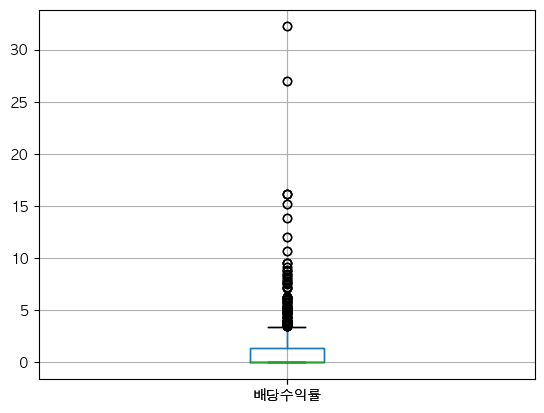

In [60]:
dataset[['배당수익률']].boxplot()
plt.show()

In [61]:
dataset[dataset['배당수익률']>10][['회사명', '회계년도', '배당금지급(-)', '시가총액', '배당수익률']]

,회사명,회계년도,배당금지급(-),시가총액,배당수익률
거래소코드,,,,,
000150,(주)두산,2015/12,-226846950.0000,1882473588.0000,12.0505
001530,디아이동일(주),2012/12,-13063580.0000,94526996.9000,13.8199
009200,무림페이퍼(주),2012/12,-16432957.0000,101526716.4000,16.1858
024900,덕양산업(주),2012/12,-16001664.0000,49661594.5000,32.2214
035080,(주)그래디언트,2020/12,-28182001.0000,174556700.4500,16.1449
041520,(주)이라이콤,2017/12,-9384295.0000,87880743.3000,10.6784
067250,STX조선해양(주),2012/12,-160468000.0000,593439768.7000,27.0403
114450,그린생명과학(주),2013/12,-7500000.0000,49275000.0000,15.2207


In [ ]:
# # 시가총액 추가

# marcap = pd.read_csv('../data/3_2_시가총액추가.csv', dtype = {'거래소코드' : 'object'})

# for ticker in dataset.index:
#     year = dataset.at[ticker, '회계년도']
    
#     idx = marcap[(marcap['거래소코드']==ticker) & (marcap['회계년도']==year)].index[0]
#     dataset.loc[ticker, '시가총액'] = marcap.at[idx, '시가총액']
#     dataset.loc[ticker, '시가총액'] = marcap.at[idx, '상장주식수']

# dataset[['시가총액', '상장주식수']].isna().sum()

In [68]:
# 파일로 저장
dataset.to_csv('../data/5_데이터셋생성_재무.csv')

## 레이블 분포 확인

In [63]:
dataset.shape

(1385, 171)

In [64]:
dataset['label'].value_counts()

label
0.0000    902
1.0000    483
Name: count, dtype: int64

In [65]:
dataset.groupby('market')['label'].value_counts()

market  label 
KOSDAQ  0.0000    639
        1.0000    318
KOSPI   0.0000    263
        1.0000    165
Name: count, dtype: int64

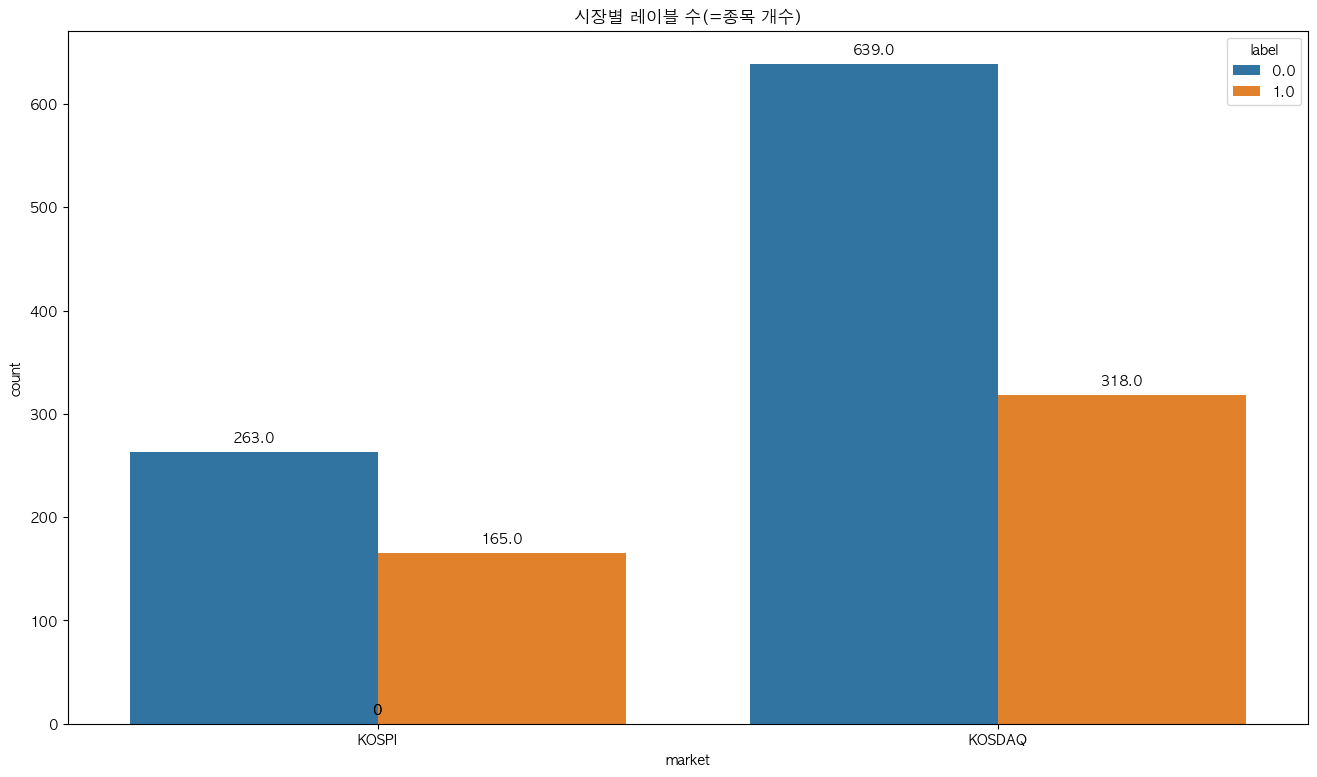

In [66]:
plt.figure(figsize=(16, 9))
ax = sns.countplot(x='market', hue='label', data=dataset)

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('시장별 레이블 수(=종목 개수)')
plt.show()

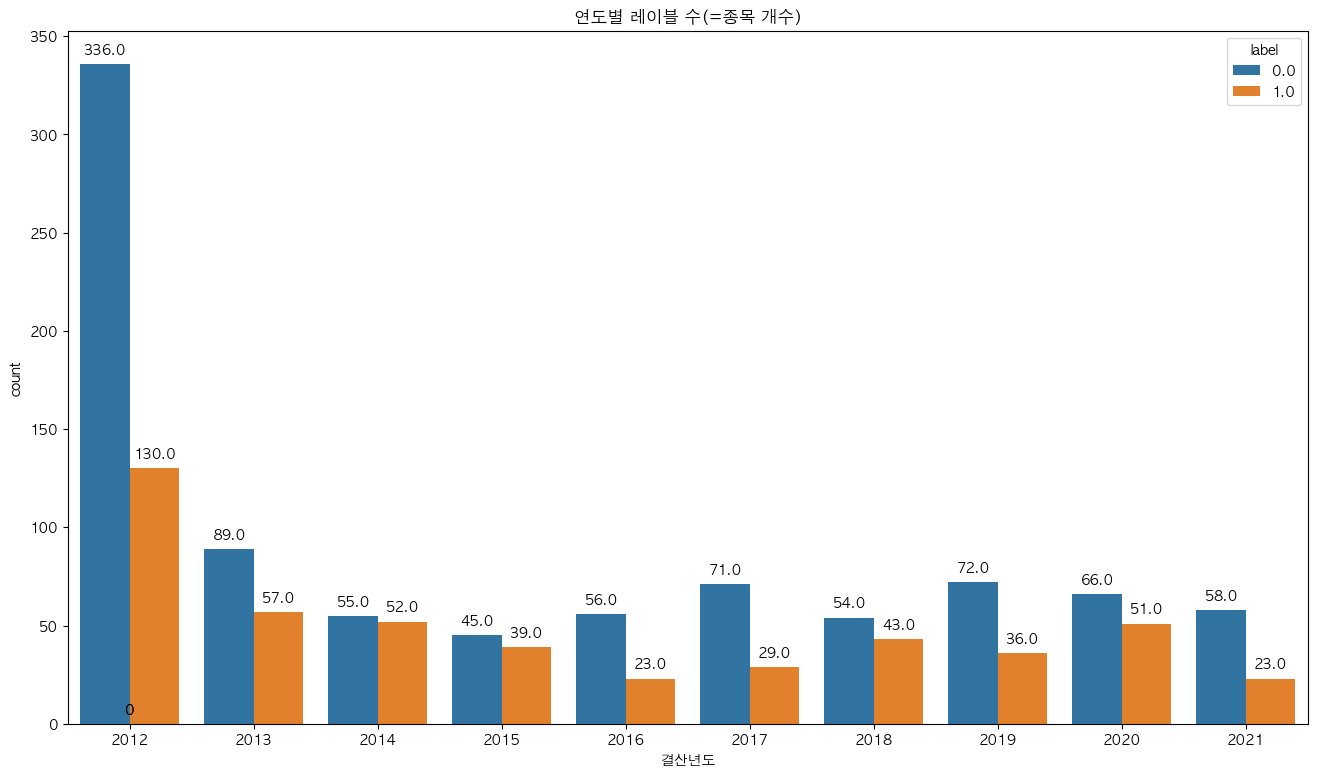

In [67]:
plt.figure(figsize=(16, 9))
ax = sns.countplot(x='결산년도', hue='label', data=dataset)

# 각 막대 위에 개수 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('연도별 레이블 수(=종목 개수)')
plt.show()